In [3]:
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from random import randint

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
def weight_variable(shape):
  initial = tf.random_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [5]:
x = tf.placeholder(tf.float32,[None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

x_image = tf.reshape(x, [-1,28,28,1])

W_conv = weight_variable([5, 5, 1, 25])
b_conv = bias_variable([25])

W_fc1 = weight_variable([14 * 14 * 25, 400])
b_fc1 = bias_variable([400])

W_fc2 = weight_variable([400, 10])
b_fc2 = bias_variable([10])

h_conv = tf.nn.relu(conv2d(x_image, W_conv) + b_conv)
h_pool = max_pool_2x2(h_conv)

h_pool_flat = tf.reshape(h_pool, [-1, 14*14*25])
h_fc1 = tf.nn.relu(tf.matmul(h_pool_flat, W_fc1) + b_fc1)


keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)


testPerformance = []
trainPerformance = []

sess = tf.InteractiveSession()
mse = tf.reduce_mean(tf.square(y_-y_conv))
train_step = tf.train.AdamOptimizer(0.001).minimize(mse)

sess.run(tf.initialize_all_variables())

for i in range(350):
    batch = mnist.train.next_batch(100)
    
    if i%50 == 0:
        testPerformance.append( mse.eval(feed_dict={
            x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))
        trainPerformance.append(mse.eval(feed_dict={
            x:batch[0], y_: batch[1], keep_prob: 1.0}))
        print "step %d, training losss %g"%(i, trainPerformance[-1])
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})



step 0, training losss 0.110086
step 50, training losss 0.0221255
step 100, training losss 0.00941637
step 150, training losss 0.0189013
step 200, training losss 0.00630801
step 250, training losss 0.0114594
step 300, training losss 0.00568325


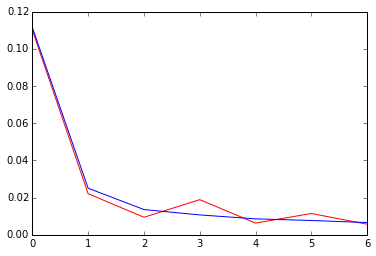

In [6]:
plt.plot(trainPerformance, 'r')
plt.plot(testPerformance, 'b')

(10000,)
(10000,)


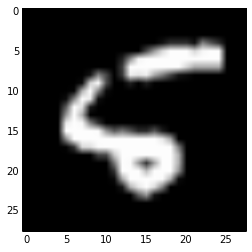

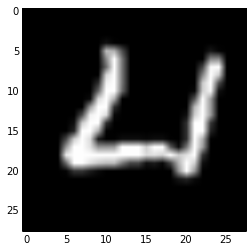

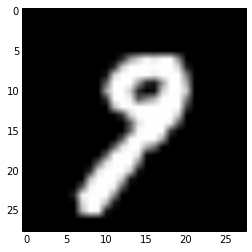

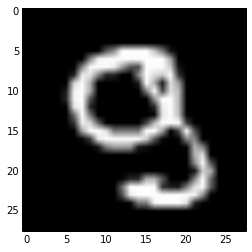

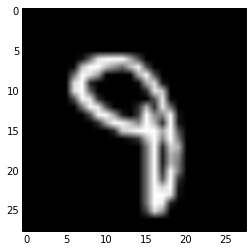

Error on test set: 0.0365


In [7]:
pred = np.argmax(sess.run(y_conv, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}),axis=1)
trueLabels = np.argmax(mnist.test.labels,axis=1)

print trueLabels.shape
print pred.shape

errors = 0.

for i in range(len(trueLabels)):
    if trueLabels[i] != pred[i]:
        if i<200:
            plt.imshow(mnist.test.images[i].reshape((28,28)), cmap='gray')
            plt.show()
        errors = errors+1
        
print "Error on test set: "+str(errors/pred.shape[0])        

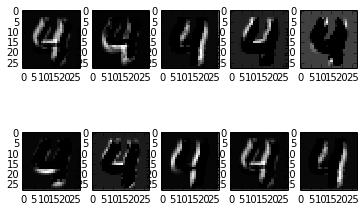

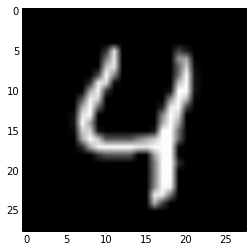

In [8]:
conv1 = sess.run(h_conv, feed_dict={x: mnist.test.images[4:], y_: mnist.test.labels})[0,:,:,:]

f, axes = plt.subplots(2, 5)

for i in range(10):
    axes.ravel()[i].imshow(np.asarray(conv1[:,:,randint(0,19)]).reshape((28,28)), cmap="gray",interpolation="none")

plt.show()
plt.imshow(mnist.test.images[4].reshape(28,28), cmap="gray")
    